dans ce fichier nous allons mettre les requêtes de filtres et nettoyage des données

In [1]:
import pandas as pd
films_tmdb_imdb = pd.read_csv("./donnees/table_films_select.csv",sep='\t', low_memory=False)

In [2]:
films_tmdb_imdb = films_tmdb_imdb.drop('Unnamed: 0',axis=1)

In [3]:
films_tmdb_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770236 entries, 0 to 770235
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   adult                 770236 non-null  bool   
 1   budget                770236 non-null  int64  
 2   genres                770236 non-null  object 
 3   id                    770236 non-null  int64  
 4   imdb_id               770236 non-null  object 
 5   original_language     770236 non-null  object 
 6   original_title        770236 non-null  object 
 7   overview              732422 non-null  object 
 8   popularity            770236 non-null  float64
 9   poster_path           729654 non-null  object 
 10  production_countries  770236 non-null  object 
 11  release_date          762336 non-null  object 
 12  revenue               770236 non-null  int64  
 13  runtime               770236 non-null  int64  
 14  spoken_languages      770236 non-null  object 
 15  

In [4]:
films_tmdb_imdb['release_date'] = pd.to_datetime(films_tmdb_imdb['release_date'])

In [5]:
films_tmdb_imdb = films_tmdb_imdb.drop('tagline',axis=1)

In [6]:
films_tmdb_imdb.isna().sum()

adult                       0
budget                      0
genres                      0
id                          0
imdb_id                     0
original_language           0
original_title              0
overview                37814
popularity                  0
poster_path             40582
production_countries        0
release_date             7900
revenue                     0
runtime                     0
spoken_languages            0
status                      0
title                       0
vote_average                0
vote_count                  0
tconst                      0
directors                   0
writers                     0
nconst                     98
category                   98
characters                 98
primaryName                98
knownForTitles             98
dtype: int64

In [7]:
films_tmdb_imdb.dropna(subset=['overview'],inplace=True)

In [8]:
films_tmdb_imdb.dropna(subset=['poster_path'],inplace=True)

In [9]:
films_tmdb_imdb.dropna(subset=['release_date'],inplace=True)

In [10]:
films_tmdb_imdb.dropna(subset=['nconst','category','characters','primaryName','knownForTitles'],inplace=True)

In [11]:
films_tmdb_imdb = films_tmdb_imdb.drop('tconst',axis=1)

In [12]:
films_tmdb_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694699 entries, 0 to 770235
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 694699 non-null  bool          
 1   budget                694699 non-null  int64         
 2   genres                694699 non-null  object        
 3   id                    694699 non-null  int64         
 4   imdb_id               694699 non-null  object        
 5   original_language     694699 non-null  object        
 6   original_title        694699 non-null  object        
 7   overview              694699 non-null  object        
 8   popularity            694699 non-null  float64       
 9   poster_path           694699 non-null  object        
 10  production_countries  694699 non-null  object        
 11  release_date          694699 non-null  datetime64[ns]
 12  revenue               694699 non-null  int64         
 13  runt

In [13]:
films_tmdb_imdb = films_tmdb_imdb.rename(columns={'id': 'id_tmdb'})

In [14]:
films_tmdb_imdb[['vote_average','popularity']].sort_values(by='vote_average', ascending=False).value_counts()

vote_average  popularity
0.000         0.600         25684
              1.400          3689
5.000         0.600          3440
0.000         0.840          3334
6.000         0.600          3332
                            ...  
6.800         1.294             1
4.100         1.031             1
6.672         3.988             1
4.900         0.854             1
5.900         1.820             1
Name: count, Length: 29444, dtype: int64

In [15]:
#on va filtrer les films ayant une note sup à 5
films_tmdb_imdb_sup5 = films_tmdb_imdb[films_tmdb_imdb['vote_average']>5]

In [16]:
films_tmdb_imdb_sup5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462885 entries, 0 to 770134
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 462885 non-null  bool          
 1   budget                462885 non-null  int64         
 2   genres                462885 non-null  object        
 3   id_tmdb               462885 non-null  int64         
 4   imdb_id               462885 non-null  object        
 5   original_language     462885 non-null  object        
 6   original_title        462885 non-null  object        
 7   overview              462885 non-null  object        
 8   popularity            462885 non-null  float64       
 9   poster_path           462885 non-null  object        
 10  production_countries  462885 non-null  object        
 11  release_date          462885 non-null  datetime64[ns]
 12  revenue               462885 non-null  int64         
 13  runt

In [17]:
from datetime import datetime

In [18]:
films_tmdb_imdb_sup5['year'] = films_tmdb_imdb_sup5['release_date'].dt.year

C:\Users\gueye\AppData\Local\Temp\ipykernel_14892\2621779178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films_tmdb_imdb_sup5['year'] = films_tmdb_imdb_sup5['release_date'].dt.year


In [19]:
films_tmdb_imdb_sup5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462885 entries, 0 to 770134
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 462885 non-null  bool          
 1   budget                462885 non-null  int64         
 2   genres                462885 non-null  object        
 3   id_tmdb               462885 non-null  int64         
 4   imdb_id               462885 non-null  object        
 5   original_language     462885 non-null  object        
 6   original_title        462885 non-null  object        
 7   overview              462885 non-null  object        
 8   popularity            462885 non-null  float64       
 9   poster_path           462885 non-null  object        
 10  production_countries  462885 non-null  object        
 11  release_date          462885 non-null  datetime64[ns]
 12  revenue               462885 non-null  int64         
 13  runt

In [20]:
films_tmdb_imdb_sup5_2000 = films_tmdb_imdb_sup5[films_tmdb_imdb_sup5['year']>=2000]

In [21]:
films_tmdb_imdb_sup5_2000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272237 entries, 70 to 770046
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 272237 non-null  bool          
 1   budget                272237 non-null  int64         
 2   genres                272237 non-null  object        
 3   id_tmdb               272237 non-null  int64         
 4   imdb_id               272237 non-null  object        
 5   original_language     272237 non-null  object        
 6   original_title        272237 non-null  object        
 7   overview              272237 non-null  object        
 8   popularity            272237 non-null  float64       
 9   poster_path           272237 non-null  object        
 10  production_countries  272237 non-null  object        
 11  release_date          272237 non-null  datetime64[ns]
 12  revenue               272237 non-null  int64         
 13  run

In [22]:
len(films_tmdb_imdb_sup5_2000['id_tmdb'].unique())

14672

In [28]:
films_tmdb_imdb_sup5_2000_60 = films_tmdb_imdb_sup5_2000[films_tmdb_imdb_sup5_2000['runtime']>=60]

In [29]:
films_tmdb_imdb_sup5_2000_60.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246079 entries, 70 to 769918
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 246079 non-null  bool          
 1   budget                246079 non-null  int64         
 2   genres                246079 non-null  object        
 3   id_tmdb               246079 non-null  int64         
 4   imdb_id               246079 non-null  object        
 5   original_language     246079 non-null  object        
 6   original_title        246079 non-null  object        
 7   overview              246079 non-null  object        
 8   popularity            246079 non-null  float64       
 9   poster_path           246079 non-null  object        
 10  production_countries  246079 non-null  object        
 11  release_date          246079 non-null  datetime64[ns]
 12  revenue               246079 non-null  int64         
 13  run

In [30]:
films_tmdb_imdb_sup5_2000_60['status'].value_counts()

status
Released    246079
Name: count, dtype: int64

In [32]:
df_basics = pd.read_csv("./donnees/IMDb/title.basics.tsv", sep='\t',low_memory=False)

In [34]:
films = pd.read_csv("./donnees/films_selectionnes.csv", sep='\t')

In [40]:
verif = pd.merge(films,df_basics, how = 'left',left_on='imdb_id', right_on='tconst')

In [41]:
verif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12771 entries, 0 to 12770
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            12771 non-null  int64  
 1   adult                 12771 non-null  bool   
 2   budget                12771 non-null  int64  
 3   genres_x              12771 non-null  object 
 4   id_tmdb               12771 non-null  int64  
 5   imdb_id               12771 non-null  object 
 6   original_language     12771 non-null  object 
 7   original_title        12771 non-null  object 
 8   original_title.1      12771 non-null  object 
 9   overview              12771 non-null  object 
 10  popularity            12771 non-null  float64
 11  poster_path           12771 non-null  object 
 12  production_countries  12771 non-null  object 
 13  release_date          12771 non-null  object 
 14  revenue               12771 non-null  int64  
 15  runtime            

In [43]:
verif['titleType'].value_counts()

titleType
movie           11015
tvMovie           790
video             458
tvSpecial         359
tvEpisode          79
tvSeries           39
tvMiniSeries       25
videoGame           4
short               2
Name: count, dtype: int64

In [55]:
verif_v2 = verif[(verif['titleType'] == 'movie')]
verif_v2.head()

,Unnamed: 0,adult,budget,genres_x,id_tmdb,imdb_id,original_language,original_title,original_title.1,overview,...,writers,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres_y
0,70,False,12800000,"['Drama', 'Crime']",16,tt0168629,en,Dancer in the Dark,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",...,"nm0001885,nm0797604",tt0168629,movie,Dancer in the Dark,Dancer in the Dark,0,2000,\N,140,"Crime,Drama,Musical"
1,109,False,140000000,"['Adventure', 'Fantasy', 'Action']",22,tt0325980,en,Pirates of the Caribbean: The Curse of the Bla...,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 18th-century pira...",...,"nm0254645,nm0744429,nm0064181,nm0938684",tt0325980,movie,Pirates of the Caribbean: The Curse of the Bla...,Pirates of the Caribbean: The Curse of the Bla...,0,2003,\N,143,"Action,Adventure,Fantasy"
2,133,False,30000000,"['Action', 'Crime']",24,tt0266697,en,Kill Bill: Vol. 1,Kill Bill: Vol. 1,"An assassin is shot by her ruthless employer, ...",...,"nm0000233,nm0000235",tt0266697,movie,Kill Bill: Vol. 1,Kill Bill: Vol. 1,0,2003,\N,111,"Action,Crime,Thriller"
3,154,False,200000000,"['Adventure', 'Fantasy', 'Action']",58,tt0383574,en,Pirates of the Caribbean: Dead Man's Chest,Pirates of the Caribbean: Dead Man's Chest,Captain Jack Sparrow works his way out of a bl...,...,"nm0254645,nm0744429,nm0064181,nm0938684",tt0383574,movie,Pirates of the Caribbean: Dead Man's Chest,Pirates of the Caribbean: Dead Man's Chest,0,2006,\N,151,"Action,Adventure,Fantasy"
4,196,False,2000000,"['Thriller', 'Crime', 'Drama']",67,tt0445620,en,Paradise Now,Paradise Now,Two childhood friends are recruited for a suic...,...,"nm0009463,nm1178208,nm0388293",tt0445620,movie,Paradise Now,Paradise Now,0,2005,\N,91,"Crime,Drama,Thriller"


In [60]:
verif_v2.columns

Index(['Unnamed: 0', 'adult', 'budget', 'genres_x', 'id_tmdb', 'imdb_id',
       'original_language', 'original_title', 'original_title.1', 'overview',
       'popularity', 'poster_path', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title',
       'vote_average', 'vote_count', 'directors', 'writers', 'tconst',
       'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear',
       'endYear', 'runtimeMinutes', 'genres_y'],
      dtype='object')

In [62]:
verif_v2 = verif_v2.drop(['isAdult','startYear','endYear','Unnamed: 0','original_title.1','genres_y'],axis=1)

In [66]:
from datetime import datetime
verif_v2['release_date'] = pd.to_datetime(verif_v2['release_date'])

In [67]:
verif_v2['year'] = verif_v2['release_date'].dt.year

In [68]:
liste = list(verif_v2['id_tmdb'])

In [69]:
films_personnes = films_tmdb_imdb_sup5_2000_60[films_tmdb_imdb_sup5_2000_60['id_tmdb'].isin(liste)]
films_personnes.head()

,adult,budget,genres,id_tmdb,imdb_id,original_language,original_title,overview,popularity,poster_path,...,vote_average,vote_count,directors,writers,nconst,category,characters,primaryName,knownForTitles,year
70,False,12800000,"['Drama', 'Crime']",16,tt0168629,en,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",13.781,/8Wdd3fQfbbQeoSfWpHrDfaFNhBU.jpg,...,7.881,1555,nm0001885,"nm0001885,nm0797604",nm0001951,actress,"[""Selma Jezkova""]",Björk,"tt0168629,tt11138512,tt0138545,tt0110413",2000
71,False,12800000,"['Drama', 'Crime']",16,tt0168629,en,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",13.781,/8Wdd3fQfbbQeoSfWpHrDfaFNhBU.jpg,...,7.881,1555,nm0001885,"nm0001885,nm0797604",nm0000366,actress,"[""Kathy""]",Catherine Deneuve,"tt0283832,tt0061395,tt0168629,tt0058450",2000
72,False,12800000,"['Drama', 'Crime']",16,tt0168629,en,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",13.781,/8Wdd3fQfbbQeoSfWpHrDfaFNhBU.jpg,...,7.881,1555,nm0001885,"nm0001885,nm0797604",nm0001556,actor,"[""Bill Houston""]",David Morse,"tt0120689,tt0887912,tt0117500,tt0816711",2000
73,False,12800000,"['Drama', 'Crime']",16,tt0168629,en,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",13.781,/8Wdd3fQfbbQeoSfWpHrDfaFNhBU.jpg,...,7.881,1555,nm0001885,"nm0001885,nm0797604",nm0001780,actor,"[""Jeff""]",Peter Stormare,"tt0116282,tt0168629,tt0355295,tt0360486",2000
74,False,12800000,"['Drama', 'Crime']",16,tt0168629,en,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",13.781,/8Wdd3fQfbbQeoSfWpHrDfaFNhBU.jpg,...,7.881,1555,nm0001885,"nm0001885,nm0797604",nm0001297,actor,"[""Oldrich Novy""]",Joel Grey,"tt0068327,tt0089901,tt0168629,tt1024715",2000


In [50]:
films_personnes.columns

Index(['adult', 'budget', 'genres', 'id_tmdb', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'directors', 'writers', 'nconst', 'category', 'characters',
       'primaryName', 'knownForTitles', 'year'],
      dtype='object')

In [74]:
verif_v2.columns

Index(['adult', 'budget', 'genres_x', 'id_tmdb', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_countries', 'release_date', 'revenue',
       'runtime', 'spoken_languages', 'status', 'title', 'vote_average',
       'vote_count', 'directors', 'writers', 'tconst', 'titleType', 'year'],
      dtype='object')

In [71]:
verif_v2 = verif_v2.drop(['originalTitle','runtimeMinutes','primaryTitle'], axis = 1)

In [75]:
verif_v2 = verif_v2.drop('titleType',axis=1)

<Axes: xlabel='runtime'>

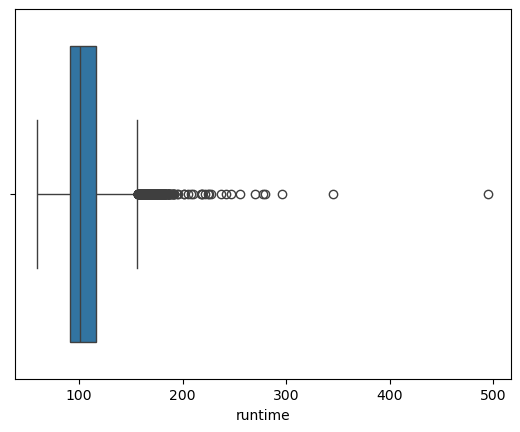

In [72]:
import seaborn as sns 
sns.boxplot(verif_v2,x='runtime')

FIN NETTOYAGE DES DONNEES 